# Building a regression model using tf.keras and the california housing dataset.

## Importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

## Loading dataset

In [4]:
housing = fetch_california_housing()

- We will be splitting the data into train, test and validation sets.
- Then these sets will be scaled using the Standard Scaler from sklearn.

In [9]:
x_train_full, x_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state = 42)

In [10]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full, random_state = 42)

In [11]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [12]:
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

In [14]:
x_train.shape[1:]

(8,)

## Building the model

- Since the data is noisy, we will be using only one hidden layer with 30 neurons in it.
- The output layer will have 1 neuron as we need to predict only the price of the house.

In [50]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(30, activation = 'relu', input_shape = x_train.shape[1:]))
model.add(keras.layers.Dense(1))

In [51]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


## Compiling the model

- Since it is a regression problem, we will be using a mean squared error loss function.
- SGD optimizer is used.

In [52]:
model.compile(loss = 'mean_squared_error', optimizer = keras.optimizers.SGD(lr = 1e-3))

## Training the model

In [53]:
history = model.fit(x_train, y_train, epochs = 20, validation_data = (x_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 1.7583 - val_loss: 0.8586
Epoch 2/20
363/363 [==============================] - 0s 745us/step - loss: 0.7261 - val_loss: 0.6457
Epoch 3/20
363/363 [==============================] - 0s 774us/step - loss: 0.6342 - val_loss: 0.5870
Epoch 4/20
363/363 [==============================] - 0s 791us/step - loss: 0.5963 - val_loss: 0.5534
Epoch 5/20
363/363 [==============================] - 0s 788us/step - loss: 0.5695 - val_loss: 0.5279
Epoch 6/20
363/363 [==============================] - 0s 755us/step - loss: 0.5485 - val_loss: 0.5088
Epoch 7/20
363/363 [==============================] - 0s 765us/step - loss: 0.5311 - val_loss: 0.4922
Epoch 8/20
363/363 [==============================] - 0s 747us/step - loss: 0.5166 - val_loss: 0.4855
Epoch 9/20
363/363 [==============================] - 0s 769us/step - loss: 0.5042 - val_loss: 0.4700
Epoch 10/20
363/363 [==============================] - 0s 798us/step - loss: 0.4934 

In [54]:
df = pd.DataFrame(history.history)

<AxesSubplot:>

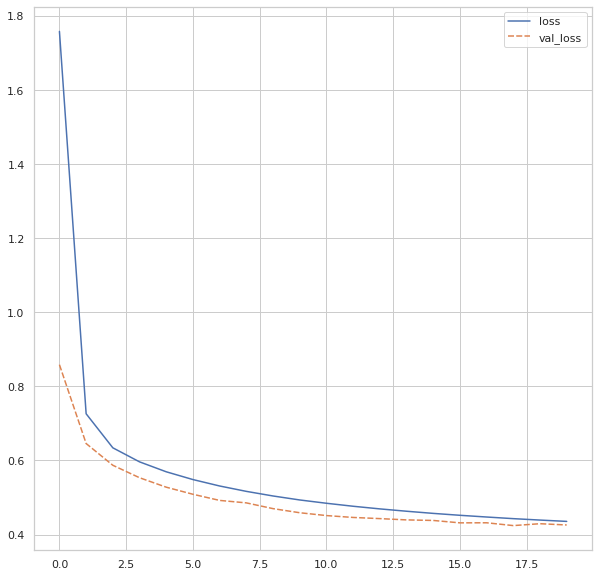

In [55]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (10,10))
sns.lineplot(data = df)

## Evaluating the model

In [56]:
mse_test = model.evaluate(x_test, y_test)

162/162 [==============================] - 0s 659us/step - loss: 0.4295


- The MSE of the model is 0.42.

## Predicting new values

- Since there are no new values available, we will using the first three values of the test set for predictions.

In [59]:
x_new = x_test[:3]
y_predict = model.predict(x_new)

In [60]:
y_predict

array([[0.57876647],
       [1.462677  ],
       [3.2089868 ]], dtype=float32)